In [22]:
from csv import reader
import csv
from collections import Counter, defaultdict
import re
import glob


path="/Users/hildavargas/Desktop/Springboard_Mini_Projects/Capstone_Project/CitiBike_Data/"

final_age_count_all=[]

for file in glob.glob(path+"*.csv"):
    
    csv_x=reader(open(file, "r"), delimiter=",")
    num=re.findall(r'\b\d+\b', file)

    ages_trips=[]

    next(csv_x)
    
    for row in csv_x:
        ages_trips.append((row[13], num[0], num[1]))

    counter=Counter(ages_trips)
    
    x=counter.items()
    
    final_age_count=[(a, b, c, d) for ((a, b, c), d) in x]
    
    final_age_count_all.append(final_age_count)

    with open("/Users/hildavargas/Desktop/Springboard_Mini_Projects/Capstone_Project/CB_real_metrics/Ages.csv", "w") as out: 
        csv_o=csv.writer(out, delimiter=',')
    
        fieldnames=['Birth Year','Year', 'Month', 'Number of Trips']
        
        csv_o.writerow(fieldnames)
    
        for row in final_age_count_all:
            csv_o.writerows(row)    
    
    

In [37]:
import pandas as pd
agesdf=pd.read_csv("/Users/hildavargas/Desktop/Springboard_Mini_Projects/Capstone_Project/CB_real_metrics/Ages.csv", na_values=[r'\N'])
agesdf=agesdf.dropna()
agesdf.head()

,Birth Year,Year,Month,Number of Trips
0,1926.0,2013,7,40
1,1987.0,2013,7,24003
2,1991.0,2013,7,5803
3,1952.0,2013,7,3267
4,1983.0,2013,7,31412


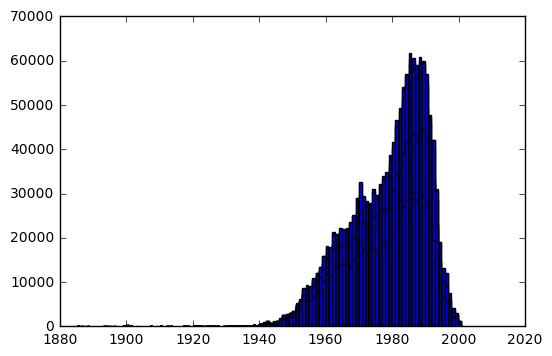

In [49]:
import matplotlib.pyplot as plt
plt.bar(agesdf['Birth Year'], agesdf['Number of Trips'])
plt.show()

According to my histogram, the outliers in my data are years of birth below ~1940. However, I would identify birth years of below 1920 as extreme outliers. Thus, I will keep birth years of 1920 and later.

The outliers are most likely due to people who did not want to share their true years of birth for privacy concerns (those who provided years of birth in the 1800's, for example). Other outliers are probably due to people who are older than the average people who use Citi Bike. 